In [ ]:
#Time series forecasting Fundamentals

In [ ]:
#Import time series data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-24 11:43:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2023-08-24 11:43:38 (19.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [ ]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
#Only date and closing price dataframe
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


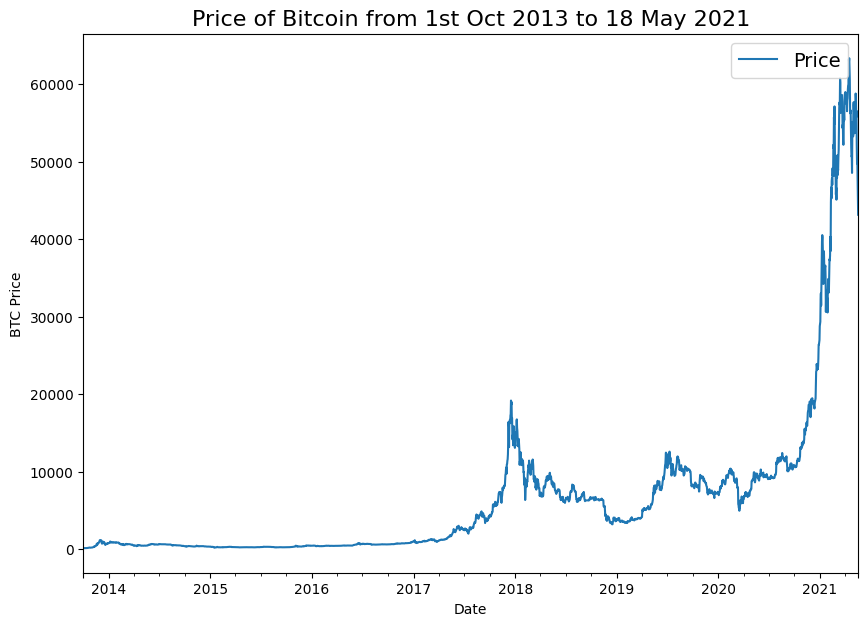

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1st Oct 2013 to 18 May 2021",fontsize=16)
plt.legend(fontsize=14)

In [ ]:
import csv
from datetime import datetime
timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader=csv.reader(f,delimiter=",")
  next(csv_reader)#Skips first line which remove sthe title
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))#get closing price as float

In [ ]:
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

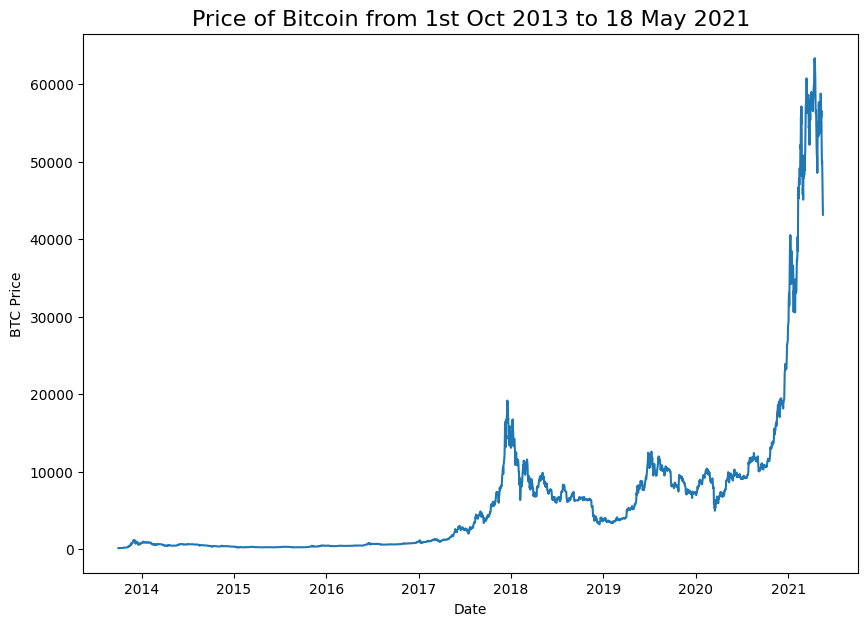

In [ ]:
#plot from csv
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1st Oct 2013 to 18 May 2021",fontsize=16)
plt.xlabel("Date")

In [ ]:
#Create train and test sets of time series data(Wrong method)
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()

In [ ]:
timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
#Wrong way to make test train sets for time series
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(timesteps,prices,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

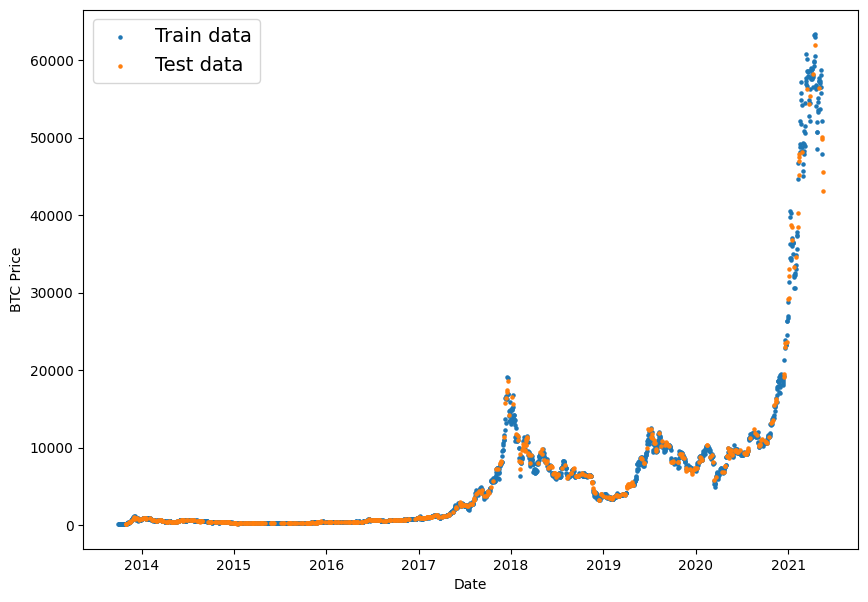

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)

In [ ]:
#create train and test sets the correct way
split_size=int(0.8*len(prices))
X_train,y_train=timesteps[:split_size],prices[:split_size]
X_test,y_test=timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

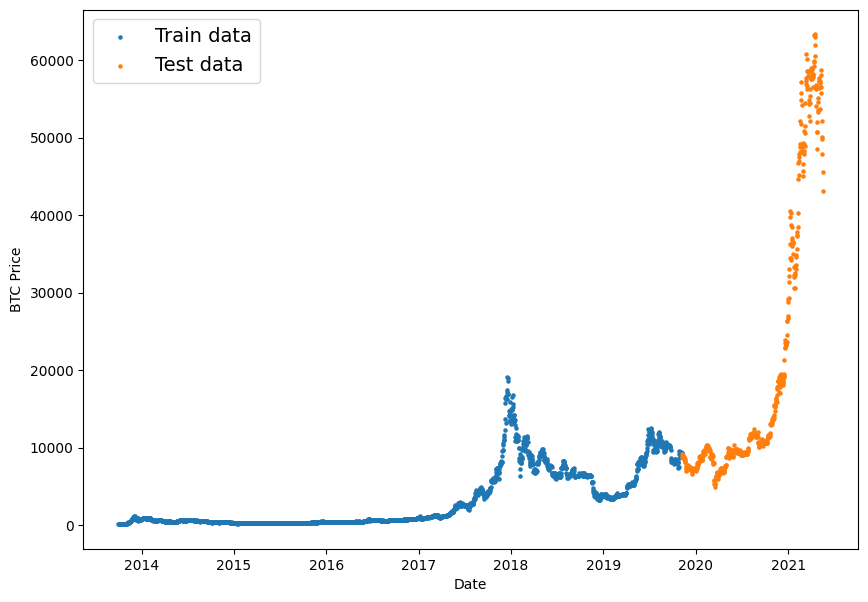

In [ ]:
#plot currently made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

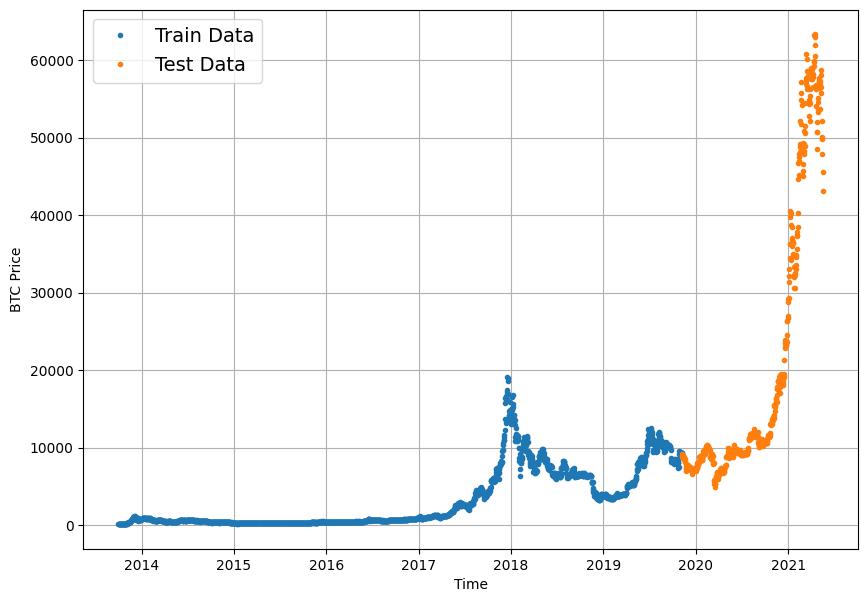

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train Data")
plot_time_series(timesteps=X_test,values=y_test,label="Test Data")

In [ ]:
naive_forecast=y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

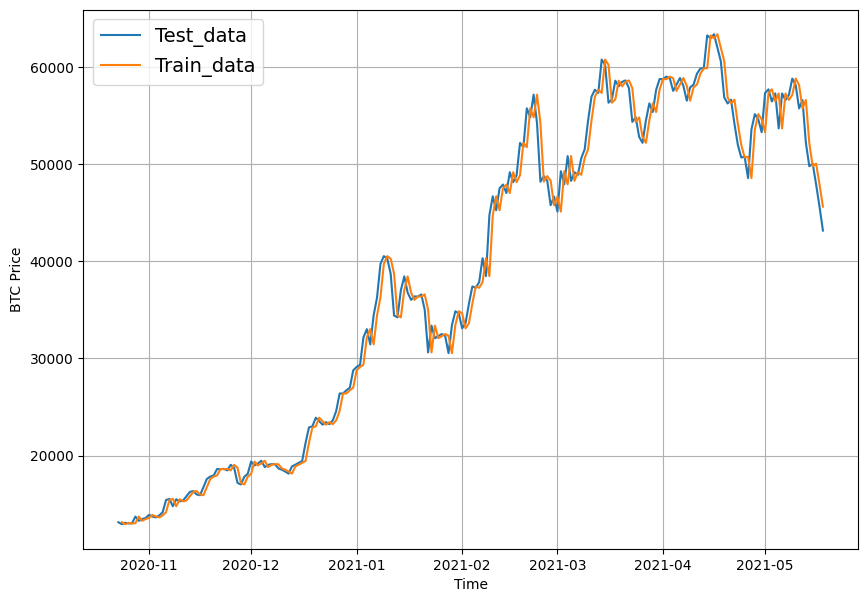

In [ ]:
plt.figure(figsize=(10,7))
# plot_time_series(X_train,y_train,label="Train_data")
plot_time_series(X_test,y_test,format="-",start=350,label="Test_data")
plot_time_series(X_test[1:],naive_forecast,format="-",start=350,label="Train_data")

In [ ]:
import tensorflow as tf

In [ ]:
#MASE in tensorflow
def mean_absolute_scaled_error(y_true,y_pred):
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_pred(y_true,y_pred):
  #good to have data type as float32
  y_true=tf.cast(y_true,tf.float32)
  y_pred=tf.cast(y_pred,tf.float32)
  d={}
  d["MAE"]=(tf.keras.losses.MAE(y_true,y_pred)).numpy()
  d["MSE"]=(tf.keras.losses.MSE(y_true,y_pred)).numpy()
  d["RSME"]=tf.sqrt(tf.keras.losses.MSE(y_true,y_pred)).numpy()
  d["MAPE"]=(tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)).numpy()
  d["MASE"]=(mean_absolute_scaled_error(y_true,y_pred)).numpy()
  return d

In [ ]:
naive_results=evaluate_pred(y_true=y_test[1:],y_pred=naive_forecast)
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RSME': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [ ]:
#Formatting data part 2:Windowing our dataset
print(f"We want to use:{btc_price[:7]} to predict this:{btc_price[7]}")

We want to use:[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this:123.033


In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
#create function to label windowed data
def get_labelled_window(x,horizon=HORIZON):
  return x[:,:-horizon],x[:,-horizon:]


In [ ]:
test_window,test_label=get_labelled_window(tf.expand_dims(btc_price,axis=0))
print(f"Window:{tf.squeeze(test_window).numpy()}->,Label:{tf.squeeze(test_label.numpy())}")

Window:[  123.65499   125.455     108.58483 ... 50032.69    47885.625
 45604.617  ]->,Label:43144.47265625


In [ ]:
def make_windows(x,windows_size=WINDOW_SIZE,horizon=HORIZON):
  #1.Create a window for specific window_size(add the horizon on the end for labelling later)
  window_step=np.expand_dims(np.arange(windows_size+horizon),axis=0)

  #2.Create a 2D array of multiple window steps(minus 1 to account for 0 indexing)
  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(windows_size+horizon-1)),axis=0).T

  #3.Index on the target array (a time series) with 2D array of multiple windows steps
  windowed_array=x[window_indexes]

  #4.get the labelled windows
  windows,labels=get_labelled_window(windowed_array,horizon=HORIZON)

  return windows,labels

In [ ]:
full_windows,full_labels=make_windows(prices,windows_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
#turning windows into training and test sets
def make_train_test_splits(windows,labels,test_split=0.2):
  split_size=int(len(windows)*(1-test_split))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels

In [ ]:
#create train and test windows
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5],test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
#check if training data remains the same even after window split
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

In [ ]:
import os

#create a function to implement a ModelCheckPoint callback with a specific filename
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),monitor="val_loss",verbose=0,save_best_only=True)

In [ ]:
#Dense Model with (window_size=7,horizon=1)
import tensorflow as tf
from tensorflow.keras import layers

#set random seed for reproducing results
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_1_dense")

#2.Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#3.fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1258.0161 - mae: 1258.0161 - mse: 5797464.5000  

18/18 [==============================] - 2s 42ms/step - loss: 1240.6504 - mae: 1240.6504 - mse: 5685086.5000 - val_loss: 3042.4514 - val_mae: 3042.4514 - val_mse: 21854080.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 464.1010 - mae: 464.1010 - mse: 972430.3750

18/18 [==============================] - 1s 32ms/step - loss: 346.4647 - mae: 346.4647 - mse: 512374.4375 - val_loss: 1405.8617 - val_mae: 1405.8617 - val_mse: 5682715.5000
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 227.6836 - mae: 227.6836 - mse: 250571.0312

18/18 [==============================] - 1s 33ms/step - loss: 225.7589 - mae: 225.7589 - mse: 250082.6406 - val_loss: 1266.0999 - val_mae: 1266.0999 - val_mse: 4842883.0000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 209.3534 - mae: 209.3534 - mse: 227869.6406

18/18 [==============================] - 1s 32ms/step - loss: 207.2861 - mae: 207.2861 - mse: 224125.4531 - val_loss: 1118.1207 - val_mae: 1118.1207 - val_mse: 4105641.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 200.4416 - mae: 200.4416 - mse: 148087.5781

18/18 [==============================] - 1s 52ms/step - loss: 198.8264 - mae: 198.8264 - mse: 207992.1406 - val_loss: 1091.1432 - val_mae: 1091.1432 - val_mse: 3889083.7500
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 193.7630 - mae: 193.7630 - mse: 186644.7656

18/18 [==============================] - 1s 50ms/step - loss: 195.2534 - mae: 195.2534 - mse: 197089.1406 - val_loss: 1062.9957 - val_mae: 1062.9957 - val_mse: 3820390.5000
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 187.9922 - mae: 187.9922 - mse: 183817.5312 - val_loss: 1072.8566 - val_mae: 1072.8566 - val_mse: 3597967.2500
Epoch 8/100
12/18 [===================>..........] - ETA: 0s - loss: 178.4701 - mae: 178.4701 - mse: 168350.6406

18/18 [==============================] - 1s 48ms/step - loss: 180.9586 - mae: 180.9586 - mse: 174949.1875 - val_loss: 995.8685 - val_mae: 995.8685 - val_mse: 3318902.2500
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 177.6622 - mae: 177.6622 - mse: 168308.9375 - val_loss: 1002.2498 - val_mae: 1002.2498 - val_mse: 3165409.0000
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 166.2712 - mae: 166.2712 - mse: 143911.6094

18/18 [==============================] - 1s 39ms/step - loss: 171.0161 - mae: 171.0161 - mse: 157926.3125 - val_loss: 930.2347 - val_mae: 930.2347 - val_mse: 2891104.2500
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 163.9005 - mae: 163.9005 - mse: 145667.0156

18/18 [==============================] - 1s 51ms/step - loss: 163.9005 - mae: 163.9005 - mse: 145667.0156 - val_loss: 910.4968 - val_mae: 910.4968 - val_mse: 2705510.5000
Epoch 12/100
10/18 [===============>..............] - ETA: 0s - loss: 159.6598 - mae: 159.6598 - mse: 148416.3594

18/18 [==============================] - 2s 89ms/step - loss: 157.9474 - mae: 157.9474 - mse: 136971.4531 - val_loss: 903.0742 - val_mae: 903.0742 - val_mse: 2576999.0000
Epoch 13/100
18/18 [==============================] - 0s 15ms/step - loss: 156.9731 - mae: 156.9731 - mse: 134891.7188 - val_loss: 973.2101 - val_mae: 973.2101 - val_mse: 2703128.7500
Epoch 14/100
18/18 [==============================] - 0s 13ms/step - loss: 153.1449 - mae: 153.1449 - mse: 125506.6484 - val_loss: 912.1586 - val_mae: 912.1586 - val_mse: 2453848.2500
Epoch 15/100
13/18 [====================>.........] - ETA: 0s - loss: 146.4645 - mae: 146.4645 - mse: 116291.5781

18/18 [==============================] - 1s 33ms/step - loss: 148.2380 - mae: 148.2380 - mse: 120775.4062 - val_loss: 834.9395 - val_mae: 834.9395 - val_mse: 2195519.2500
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 143.4610 - mae: 143.4610 - mse: 112804.6875

18/18 [==============================] - 1s 32ms/step - loss: 141.9215 - mae: 141.9215 - mse: 110909.5625 - val_loss: 831.7693 - val_mae: 831.7693 - val_mse: 2131756.5000
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 138.8062 - mae: 138.8062 - mse: 107211.0625 - val_loss: 857.2329 - val_mae: 857.2329 - val_mse: 2168324.5000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 159.7058 - mae: 159.7058 - mse: 123542.4219

18/18 [==============================] - 1s 29ms/step - loss: 140.4370 - mae: 140.4370 - mse: 108768.5781 - val_loss: 808.4897 - val_mae: 808.4897 - val_mse: 1999436.6250
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 134.1421 - mae: 134.1421 - mse: 100215.9141

18/18 [==============================] - 1s 31ms/step - loss: 133.2307 - mae: 133.2307 - mse: 99621.7500 - val_loss: 742.1749 - val_mae: 742.1749 - val_mse: 1798686.5000
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 130.2133 - mae: 130.2133 - mse: 98141.5000 - val_loss: 745.3040 - val_mae: 745.3041 - val_mse: 1881061.7500
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 133.7757 - mae: 133.7757 - mse: 98243.2656 

18/18 [==============================] - 1s 32ms/step - loss: 134.6441 - mae: 134.6441 - mse: 102902.4141 - val_loss: 729.0840 - val_mae: 729.0840 - val_mse: 1717155.3750
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 127.5202 - mae: 127.5202 - mse: 93322.4297 

18/18 [==============================] - 1s 31ms/step - loss: 126.9652 - mae: 126.9652 - mse: 92657.2500 - val_loss: 721.5199 - val_mae: 721.5199 - val_mse: 1681048.6250
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 129.2575 - mae: 129.2575 - mse: 92541.5781

18/18 [==============================] - 1s 32ms/step - loss: 129.2575 - mae: 129.2575 - mse: 92541.5781 - val_loss: 683.8201 - val_mae: 683.8201 - val_mse: 1577498.0000
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 127.4312 - mae: 127.4312 - mse: 92768.3750

18/18 [==============================] - 1s 31ms/step - loss: 125.8969 - mae: 125.8969 - mse: 91211.8750 - val_loss: 674.3793 - val_mae: 674.3793 - val_mse: 1575715.6250
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 124.2550 - mae: 124.2550 - mse: 87262.6250

18/18 [==============================] - 1s 32ms/step - loss: 124.2550 - mae: 124.2550 - mse: 87262.6250 - val_loss: 664.7599 - val_mae: 664.7599 - val_mse: 1510630.1250
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 122.5981 - mae: 122.5981 - mse: 82902.8203

18/18 [==============================] - 1s 32ms/step - loss: 122.9149 - mae: 122.9149 - mse: 86743.3594 - val_loss: 656.4197 - val_mae: 656.4197 - val_mse: 1484737.3750
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 123.4016 - mae: 123.4016 - mse: 86277.2266 - val_loss: 662.7778 - val_mae: 662.7778 - val_mse: 1529267.1250
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 122.8695 - mae: 122.8695 - mse: 86561.4531

18/18 [==============================] - 1s 33ms/step - loss: 122.6426 - mae: 122.6426 - mse: 85597.4531 - val_loss: 649.7667 - val_mae: 649.7667 - val_mse: 1446809.5000
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 117.4605 - mae: 117.4605 - mse: 79277.5156

18/18 [==============================] - 1s 40ms/step - loss: 119.7583 - mae: 119.7583 - mse: 83032.3438 - val_loss: 646.6812 - val_mae: 646.6812 - val_mse: 1431717.7500
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 124.6097 - mae: 124.6097 - mse: 87363.4062 

18/18 [==============================] - 1s 47ms/step - loss: 124.8828 - mae: 124.8828 - mse: 86095.9375 - val_loss: 638.3358 - val_mae: 638.3358 - val_mse: 1431645.3750
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 115.6833 - mae: 115.6833 - mse: 76109.5781

18/18 [==============================] - 1s 47ms/step - loss: 118.7353 - mae: 118.7353 - mse: 80653.7266 - val_loss: 629.7582 - val_mae: 629.7582 - val_mse: 1395326.1250
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 118.7188 - mae: 118.7188 - mse: 81728.5859 - val_loss: 648.5536 - val_mae: 648.5536 - val_mse: 1420129.0000
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 118.3848 - mae: 118.3848 - mse: 81147.4453 - val_loss: 679.9961 - val_mae: 679.9961 - val_mse: 1486154.7500
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 120.9796 - mae: 120.9796 - mse: 83639.6797 

18/18 [==============================] - 1s 32ms/step - loss: 120.9796 - mae: 120.9796 - mse: 83639.6797 - val_loss: 626.4816 - val_mae: 626.4816 - val_mse: 1384867.3750
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 115.3610 - mae: 115.3610 - mse: 79305.1719

18/18 [==============================] - 1s 32ms/step - loss: 115.3610 - mae: 115.3610 - mse: 79305.1719 - val_loss: 625.7828 - val_mae: 625.7828 - val_mse: 1380522.3750
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 118.9480 - mae: 118.9480 - mse: 81814.3203 

18/18 [==============================] - 1s 42ms/step - loss: 119.1430 - mae: 119.1430 - mse: 80587.9219 - val_loss: 611.5446 - val_mae: 611.5446 - val_mse: 1327942.0000
Epoch 37/100
18/18 [==============================] - 0s 9ms/step - loss: 116.3200 - mae: 116.3200 - mse: 79881.8203 - val_loss: 630.5587 - val_mae: 630.5587 - val_mse: 1355177.7500
Epoch 38/100
18/18 [==============================] - 0s 10ms/step - loss: 116.4763 - mae: 116.4763 - mse: 78883.2969 - val_loss: 638.9911 - val_mae: 638.9911 - val_mse: 1404309.5000
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 117.5434 - mae: 117.5434 - mse: 82150.1172 

18/18 [==============================] - 1s 54ms/step - loss: 115.1014 - mae: 115.1014 - mse: 77633.5078 - val_loss: 606.3232 - val_mae: 606.3232 - val_mse: 1298863.0000
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 111.6401 - mae: 111.6401 - mse: 75896.2344

18/18 [==============================] - 1s 75ms/step - loss: 112.7942 - mae: 112.7942 - mse: 75737.0859 - val_loss: 602.8108 - val_mae: 602.8108 - val_mse: 1304102.8750
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4760 - mae: 113.4760 - mse: 77013.4766 - val_loss: 645.2035 - val_mae: 645.2035 - val_mse: 1408481.7500
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 119.9151 - mae: 119.9151 - mse: 81215.5156 - val_loss: 662.7736 - val_mae: 662.7736 - val_mse: 1408662.2500
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 120.3503 - mae: 120.3503 - mse: 77336.3359 - val_loss: 681.9439 - val_mae: 681.9439 - val_mse: 1499691.2500
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 118.2703 - mae: 118.2703 - mse: 78151.6875

18/18 [==============================] - 1s 32ms/step - loss: 118.2703 - mae: 118.2703 - mse: 78151.6875 - val_loss: 592.1439 - val_mae: 592.1439 - val_mse: 1265813.5000
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3831 - mae: 111.3831 - mse: 75633.2266 - val_loss: 612.1682 - val_mae: 612.1682 - val_mse: 1311475.7500
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8918 - mae: 112.8918 - mse: 74056.6562 - val_loss: 610.9837 - val_mae: 610.9837 - val_mse: 1286197.6250
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5565 - mae: 112.5565 - mse: 75817.6641 - val_loss: 623.1357 - val_mae: 623.1357 - val_mse: 1308644.6250
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2294 - mae: 111.2294 - mse: 74032.3203 - val_loss: 599.7628 - val_mae: 599.7628 - val_mse: 1260249.8750
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2590 - mae: 113.2590 - m

18/18 [==============================] - 1s 32ms/step - loss: 119.7222 - mae: 119.7222 - mse: 78871.4688 - val_loss: 582.9042 - val_mae: 582.9042 - val_mse: 1235537.0000
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8899 - mae: 112.8899 - mse: 74933.8281 - val_loss: 598.6386 - val_mae: 598.6386 - val_mse: 1252527.2500
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2519 - mae: 114.2519 - mse: 76414.9062 - val_loss: 624.3572 - val_mae: 624.3572 - val_mse: 1321376.2500
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7778 - mae: 111.7778 - mse: 73955.9844 - val_loss: 616.7975 - val_mae: 616.7975 - val_mse: 1283361.0000
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9768 - mae: 109.9768 - mse: 71991.5938 - val_loss: 586.4912 - val_mae: 586.4912 - val_mse: 1235910.0000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6504 - mae: 114.6504 - m

18/18 [==============================] - 1s 32ms/step - loss: 112.5586 - mae: 112.5586 - mse: 73173.9609 - val_loss: 576.5074 - val_mae: 576.5074 - val_mse: 1211049.0000
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6278 - mae: 109.6278 - mse: 71826.7031 - val_loss: 581.4219 - val_mae: 581.4219 - val_mse: 1213734.6250
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1908 - mae: 109.1908 - mse: 71797.6172 - val_loss: 593.6631 - val_mae: 593.6631 - val_mse: 1231236.1250
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8837 - mae: 110.8837 - mse: 71920.6875 - val_loss: 596.3079 - val_mae: 596.3079 - val_mse: 1245467.6250
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4236 - mae: 110.4236 - mse: 72787.5859 - val_loss: 608.3828 - val_mae: 608.3828 - val_mse: 1257639.3750
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4385 - mae: 110.4385 - m

18/18 [==============================] - 1s 32ms/step - loss: 109.6736 - mae: 109.6736 - mse: 71801.9922 - val_loss: 574.2413 - val_mae: 574.2413 - val_mse: 1193338.6250
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 107.7680 - mae: 107.7680 - mse: 70199.8906 - val_loss: 646.7921 - val_mae: 646.7921 - val_mse: 1355288.0000
Epoch 68/100
 8/18 [============>.................] - ETA: 0s - loss: 99.2077 - mae: 99.2077 - mse: 51382.3359

18/18 [==============================] - 1s 62ms/step - loss: 108.6954 - mae: 108.6954 - mse: 69903.4688 - val_loss: 571.2255 - val_mae: 571.2255 - val_mse: 1192041.8750
Epoch 69/100
18/18 [==============================] - 0s 12ms/step - loss: 111.9041 - mae: 111.9041 - mse: 71351.3594 - val_loss: 670.9654 - val_mae: 670.9654 - val_mse: 1395369.8750
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 118.9634 - mae: 118.9634 - mse: 75835.2500 - val_loss: 589.7831 - val_mae: 589.7831 - val_mse: 1224757.1250
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8021 - mae: 110.8021 - mse: 70775.4531 - val_loss: 573.3734 - val_mae: 573.3734 - val_mse: 1194625.1250
Epoch 72/100
18/18 [==============================] - 0s 12ms/step - loss: 109.1473 - mae: 109.1473 - mse: 71517.9922 - val_loss: 580.0793 - val_mae: 580.0793 - val_mse: 1205545.6250
Epoch 73/100
18/18 [==============================] - 0s 13ms/step - loss: 112.9796 - mae: 112.9796 

18/18 [==============================] - 1s 66ms/step - loss: 111.4263 - mae: 111.4263 - mse: 74208.2734 - val_loss: 566.6984 - val_mae: 566.6984 - val_mse: 1173670.8750
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 107.6025 - mae: 107.6025 - mse: 70629.1016 - val_loss: 583.2292 - val_mae: 583.2292 - val_mse: 1196341.3750
Epoch 81/100
18/18 [==============================] - 0s 12ms/step - loss: 107.1679 - mae: 107.1679 - mse: 70117.2500 - val_loss: 584.2962 - val_mae: 584.2962 - val_mse: 1197729.6250
Epoch 82/100
18/18 [==============================] - 0s 11ms/step - loss: 116.1897 - mae: 116.1897 - mse: 76681.5312 - val_loss: 604.7712 - val_mae: 604.7712 - val_mse: 1240321.7500
Epoch 83/100
18/18 [==============================] - 0s 13ms/step - loss: 117.9886 - mae: 117.9886 - mse: 76972.5625 - val_loss: 650.0095 - val_mae: 650.0095 - val_mse: 1353198.6250
Epoch 84/100
18/18 [==============================] - 0s 12ms/step - loss: 116.2573 - mae: 116.2573

18/18 [==============================] - 2s 91ms/step - loss: 110.6741 - mae: 110.6741 - mse: 73082.9531 - val_loss: 566.2369 - val_mae: 566.2369 - val_mse: 1168323.7500
Epoch 89/100
18/18 [==============================] - 0s 16ms/step - loss: 106.8205 - mae: 106.8205 - mse: 69325.6406 - val_loss: 578.8488 - val_mae: 578.8488 - val_mse: 1192308.2500
Epoch 90/100
18/18 [==============================] - 0s 17ms/step - loss: 106.3277 - mae: 106.3277 - mse: 68703.4688 - val_loss: 600.5472 - val_mae: 600.5472 - val_mse: 1229398.3750
Epoch 91/100
18/18 [==============================] - 0s 18ms/step - loss: 110.9008 - mae: 110.9008 - mse: 72021.9922 - val_loss: 583.2082 - val_mae: 583.2082 - val_mse: 1201020.2500
Epoch 92/100
18/18 [==============================] - 0s 14ms/step - loss: 110.2969 - mae: 110.2969 - mse: 72263.8906 - val_loss: 599.8571 - val_mae: 599.8571 - val_mse: 1234318.8750
Epoch 93/100
18/18 [==============================] - 0s 15ms/step - loss: 120.6307 - mae: 120.630

18/18 [==============================] - 1s 65ms/step - loss: 107.0931 - mae: 107.0931 - mse: 69976.2734 - val_loss: 565.4108 - val_mae: 565.4108 - val_mse: 1162941.5000
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 111.1461 - mae: 111.1461 - mse: 69902.5078 - val_loss: 625.6913 - val_mae: 625.6913 - val_mse: 1282092.2500


In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 625.6913 - mae: 625.6913 - mse: 1282092.2500


[625.6913452148438, 625.6913452148438, 1282092.25]

In [ ]:
model_1=tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 1s 4ms/step - loss: 565.4106 - mae: 565.4106 - mse: 1162941.5000


[565.41064453125, 565.41064453125, 1162941.5]

In [ ]:
def make_preds(model,input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds=make_preds(model_1,test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.155 , 8769.6875, 9031.693 , 8793.315 , 8727.14  , 8732.233 ,
       8678.112 , 8525.115 , 8450.228 , 8525.788 ], dtype=float32)>

In [ ]:
model_1_results=evaluate_pred(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results

{'MAE': 565.41064,
 'MSE': 1162941.5,
 'RSME': 1078.3977,
 'MAPE': 2.5172708,
 'MASE': 0.9932699}

In [ ]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RSME': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

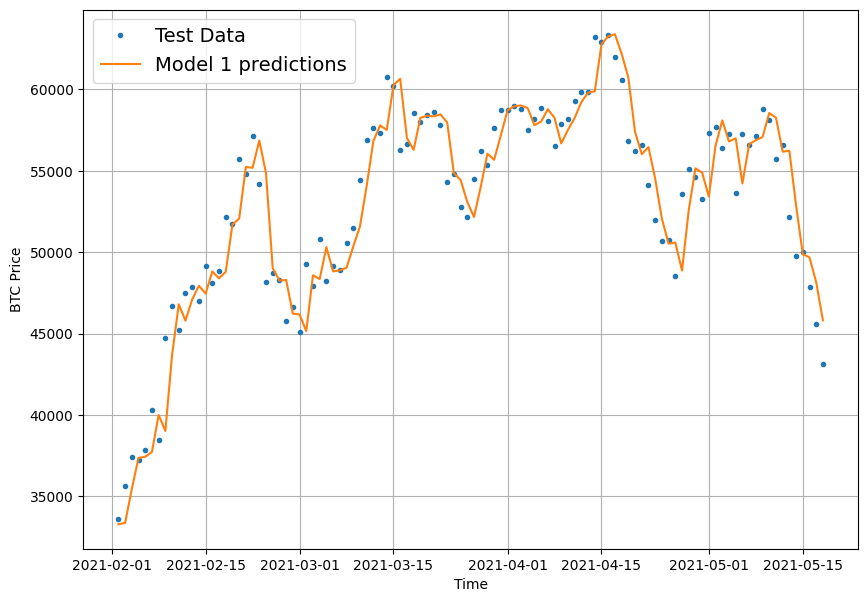

In [ ]:
offset=450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,start=offset,format="-",label="Model 1 predictions")

In [ ]:
HORIZON=1
WINDOW_SIZE=30

In [ ]:
#Make windowed data with appropriate horizon and window sizes
full_windows,full_labels=make_windows(prices,windows_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2757, 2757)

In [ ]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(windows=full_windows,labels=full_labels,test_split=0.2)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3],train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
#Model 2:Dense model with window size of 30 and horizon of 1
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_2_dense")

#compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 642.9833 - mae: 642.9833 - mse: 1368942.8750


[642.9832763671875, 642.9832763671875, 1368942.875]

In [ ]:
model_2=tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 609.4073 - mae: 609.4073 - mse: 1263384.1250


[609.4073486328125, 609.4073486328125, 1263384.125]

In [ ]:
model_2_preds=make_preds(model_2,test_windows)
model_2_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8779.745 , 8782.655 , 8700.3955, 8567.833 , 8542.323 , 8347.347 ,
       8290.571 , 8119.6685, 8074.9814, 7752.699 ], dtype=float32)>

In [ ]:
model_2_results=evaluate_pred(y_true=tf.squeeze(test_labels),y_pred=model_2_preds)
model_2_results

{'MAE': 609.4073,
 'MSE': 1263384.2,
 'RSME': 1124.0037,
 'MAPE': 2.7367609,
 'MASE': 1.0652499}

In [ ]:
model_1_results

{'MAE': 565.41064,
 'MSE': 1162941.5,
 'RSME': 1078.3977,
 'MAPE': 2.5172708,
 'MASE': 0.9932699}

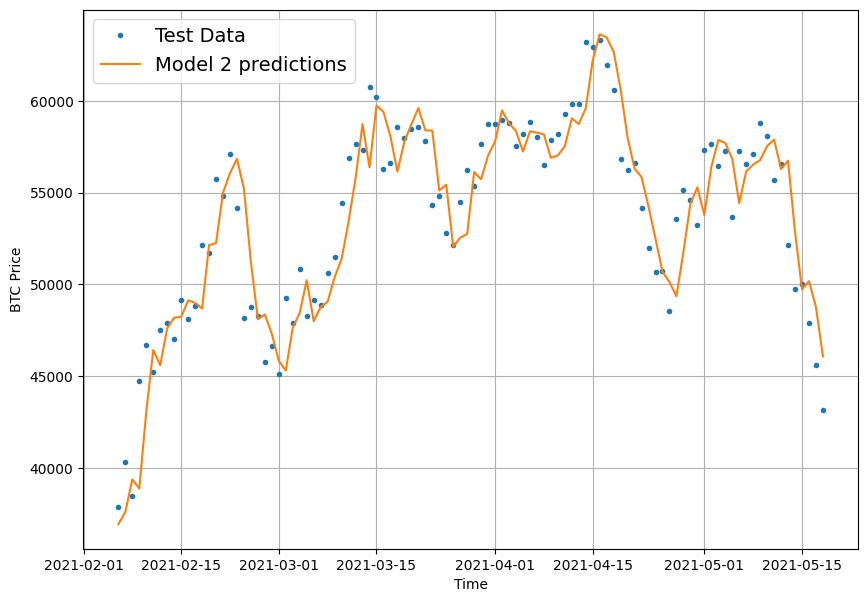

In [ ]:
offset=450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,start=offset,format="-",label="Model 2 predictions")

In [ ]:
HORIZON=7
WINDOW_SIZE=30

In [ ]:
full_windows,full_labels=make_windows(prices,windows_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2751, 2751)

In [ ]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(windows=full_windows,labels=full_labels,test_split=0.2)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
#Model 3:Dense model with window size of 30 and horizon size of 7
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1890.1400 

18/18 [==============================] - 1s 35ms/step - loss: 1890.1400 - val_loss: 3217.5117
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 546.6229

18/18 [==============================] - 1s 29ms/step - loss: 541.8220 - val_loss: 2510.3701
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 418.9808

18/18 [==============================] - 1s 30ms/step - loss: 422.3400 - val_loss: 2127.8545
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 386.2062

18/18 [==============================] - 1s 29ms/step - loss: 386.2062 - val_loss: 2011.8344
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 364.4174 - val_loss: 2177.6704
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 326.9748

18/18 [==============================] - 1s 30ms/step - loss: 349.5712 - val_loss: 1817.9442
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 297.1513

18/18 [==============================] - 1s 56ms/step - loss: 328.9101 - val_loss: 1638.9404
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 321.6608 - val_loss: 1659.0168
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 312.5749 - val_loss: 1762.0077
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 266.7900

18/18 [==============================] - 1s 30ms/step - loss: 312.1281 - val_loss: 1578.8341
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 311.0330

18/18 [==============================] - 1s 30ms/step - loss: 304.3806 - val_loss: 1554.8171
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 292.1359 - val_loss: 1607.8422
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 288.0676

18/18 [==============================] - 1s 31ms/step - loss: 288.0812 - val_loss: 1515.5106
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 286.5874 - val_loss: 1526.3540
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 281.8603 - val_loss: 1607.3511
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 271.9746

18/18 [==============================] - 0s 28ms/step - loss: 279.0794 - val_loss: 1486.0674
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 271.9106 - val_loss: 1625.3448
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 272.9675 - val_loss: 1599.4795
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 269.1043 - val_loss: 1665.1954
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 255.5952

18/18 [==============================] - 1s 29ms/step - loss: 273.0540 - val_loss: 1461.3464
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 262.4108 - val_loss: 1487.0098
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 336.3080

18/18 [==============================] - 0s 29ms/step - loss: 262.0382 - val_loss: 1437.8083
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 269.2048

18/18 [==============================] - 0s 28ms/step - loss: 263.8398 - val_loss: 1419.1932
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 275.9666

18/18 [==============================] - 1s 43ms/step - loss: 275.8033 - val_loss: 1413.4001
Epoch 25/100
18/18 [==============================] - 0s 8ms/step - loss: 258.5814 - val_loss: 1624.2875
Epoch 26/100
18/18 [==============================] - 0s 8ms/step - loss: 259.4027 - val_loss: 1484.8583
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 254.5985 - val_loss: 1444.1179
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 264.4108

18/18 [==============================] - 1s 43ms/step - loss: 256.1432 - val_loss: 1410.2627
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 255.6182 - val_loss: 1440.9535
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 248.2248

18/18 [==============================] - 1s 36ms/step - loss: 253.8441 - val_loss: 1400.2019
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 250.3511 - val_loss: 1414.4299
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 245.2806

18/18 [==============================] - 0s 29ms/step - loss: 250.2249 - val_loss: 1395.0442
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 231.8065

18/18 [==============================] - 1s 30ms/step - loss: 247.8875 - val_loss: 1359.9258
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 249.7999 - val_loss: 1431.1233
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 250.8413 - val_loss: 1429.0031
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 248.1379 - val_loss: 1412.3175
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 261.2333 - val_loss: 1420.0315
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 249.0065 - val_loss: 1388.4099
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 249.6451 - val_loss: 1363.5328
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 243.8795 - val_loss: 1515.8810
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 246.7079 - val_loss: 1598.0048
Epoch 42/100
18/18 [==============================] - 0s 6ms/step -

18/18 [==============================] - 1s 31ms/step - loss: 241.5701 - val_loss: 1356.8368
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 236.2769

18/18 [==============================] - 1s 29ms/step - loss: 242.9922 - val_loss: 1352.7240
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 242.5984 - val_loss: 1531.4534
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 255.2325

18/18 [==============================] - 0s 29ms/step - loss: 246.1508 - val_loss: 1347.2008
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 242.7134 - val_loss: 1369.8525
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 268.4736

18/18 [==============================] - 1s 29ms/step - loss: 240.4178 - val_loss: 1342.6982
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 249.9590 - val_loss: 1448.0134
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 283.9288

18/18 [==============================] - 0s 27ms/step - loss: 246.8078 - val_loss: 1308.9908
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 237.8367 - val_loss: 1431.4128
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 237.6505 - val_loss: 1319.6232
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 238.2034 - val_loss: 1319.5425
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 242.7514 - val_loss: 1312.4834
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 237.1983 - val_loss: 1328.7214
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 237.0426 - val_loss: 1329.7850
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 236.6759 - val_loss: 1331.3215
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 224.2598

18/18 [==============================] - 1s 30ms/step - loss: 237.3081 - val_loss: 1304.6497
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 237.4554 - val_loss: 1351.9603
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 212.6149

18/18 [==============================] - 0s 28ms/step - loss: 237.4813 - val_loss: 1288.1553
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 235.2606 - val_loss: 1499.2440
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 352.7001

18/18 [==============================] - 1s 30ms/step - loss: 237.9656 - val_loss: 1275.9976
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 235.8743 - val_loss: 1384.3713
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 234.0842 - val_loss: 1285.4640
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 234.8017 - val_loss: 1401.5104
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 232.8822 - val_loss: 1555.2394
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 239.3961 - val_loss: 1292.2449
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 237.8073 - val_loss: 1304.6947
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 233.4963 - val_loss: 1802.4974
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 245.4812 - val_loss: 1379.2345
Epoch 71/100
18/18 [==============================] - 0s 5ms/step -

18/18 [==============================] - 1s 30ms/step - loss: 236.0867 - val_loss: 1260.6754
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 232.6102 - val_loss: 1331.1288
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 230.2375 - val_loss: 1309.0507
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 234.4970 - val_loss: 1563.5985
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 233.9322 - val_loss: 1317.9469
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 230.7479 - val_loss: 1269.4989
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 231.2416 - val_loss: 1290.6335
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 236.9679 - val_loss: 1308.7960
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 233.5321 - val_loss: 1346.9215
Epoch 81/100
18/18 [==============================] - 0s 5ms/step -

18/18 [==============================] - 1s 43ms/step - loss: 226.6074 - val_loss: 1255.1864
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 232.7157 - val_loss: 1317.7825
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 232.4525 - val_loss: 1498.9637
Epoch 95/100
18/18 [==============================] - 0s 7ms/step - loss: 235.3964 - val_loss: 1304.5337
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 232.0104 - val_loss: 1472.3561
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 251.5053 - val_loss: 1530.9880
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 230.7138 - val_loss: 1357.2980
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 228.0246 - val_loss: 1263.4193
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 227.3581 - val_loss: 1486.3982


In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1486.3981


1486.3980712890625

In [ ]:
model_3=tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1255.1864


1255.1864013671875

In [ ]:
model_3_preds=make_preds(model_3,test_windows)
model_3_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[9417.507 , 9530.712 , 9500.1875, 9673.915 , 9379.354 , 9930.988 ,
        9848.607 ],
       [9145.522 , 9030.117 , 9081.041 , 9578.639 , 8875.408 , 9498.76  ,
        9419.698 ],
       [9051.696 , 8937.109 , 9073.138 , 9441.563 , 8909.524 , 9283.309 ,
        9367.495 ],
       [9050.077 , 9219.25  , 9353.369 , 9492.524 , 9317.918 , 9461.049 ,
        9399.184 ],
       [8866.187 , 9137.48  , 9340.601 , 9204.712 , 9311.605 , 9280.852 ,
        9117.52  ],
       [8604.126 , 9038.487 , 9235.287 , 8998.653 , 9107.094 , 9085.138 ,
        9058.32  ],
       [8700.39  , 8906.458 , 8905.068 , 8980.8955, 8983.899 , 8950.24  ,
        8835.159 ],
       [8798.804 , 8871.592 , 8655.716 , 8992.499 , 8710.719 , 8781.771 ,
        8984.504 ],
       [8661.749 , 8589.756 , 8549.762 , 8824.767 , 8515.109 , 8623.413 ,
        8806.551 ],
       [8512.018 , 8324.873 , 8522.855 , 8672.79  , 8446.962 , 8519.295 ,
        8622.09  ]], dtype=floa

In [ ]:
from keras.utils.image_utils import ResizeMethod
#updated evaluate function for working with larger horizons

def evaluate_pred(y_true,y_pred):
  #good to have data type as float32
  y_true=tf.cast(y_true,tf.float32)
  y_pred=tf.cast(y_pred,tf.float32)
  d={}
  mae=(tf.keras.losses.MAE(y_true,y_pred))
  mse=(tf.keras.losses.MSE(y_true,y_pred))
  rsme=tf.sqrt(mse)
  mape=(tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred))
  mase=(mean_absolute_scaled_error(y_true,y_pred))
  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rsme=tf.reduce_mean(rsme)
    mape=tf.reduce_mean(mape)
    mase=tf.reduce_mean(mase)
  d["MAE"]=mae.numpy()
  d["MSE"]=mse.numpy()
  d["RSME"]=rsme.numpy()
  d["MAPE"]=mape.numpy()
  d["MASE"]=mase.numpy()
  return d

In [ ]:
model_3_results=evaluate_pred(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_preds)
model_3_results

{'MAE': 1255.1864,
 'MSE': 5676088.5,
 'RSME': 1442.6051,
 'MAPE': 5.7418604,
 'MASE': 2.233534}

In [ ]:
model_3_results,naive_results

({'MAE': 1255.1864,
  'MSE': 5676088.5,
  'RSME': 1442.6051,
  'MAPE': 5.7418604,
  'MASE': 2.233534},
 {'MAE': 567.9802,
  'MSE': 1147547.0,
  'RSME': 1071.2362,
  'MAPE': 2.516525,
  'MASE': 0.99957})

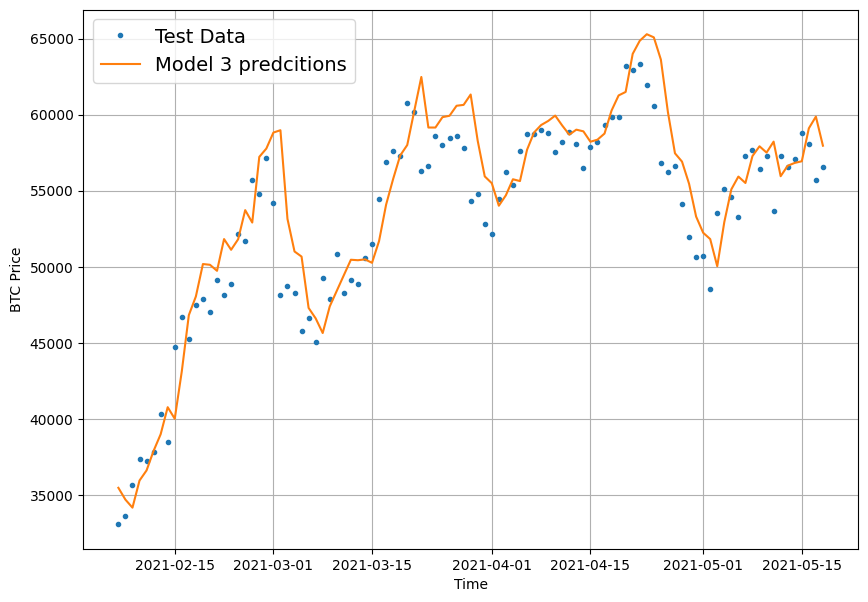

In [ ]:
offset=450
plt.figure(figsize=(10,7))
model_3_condensed=tf.reduce_mean(model_3_preds)
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis=1),start=offset,format="-",label="Model 3 predcitions")

<Axes: >

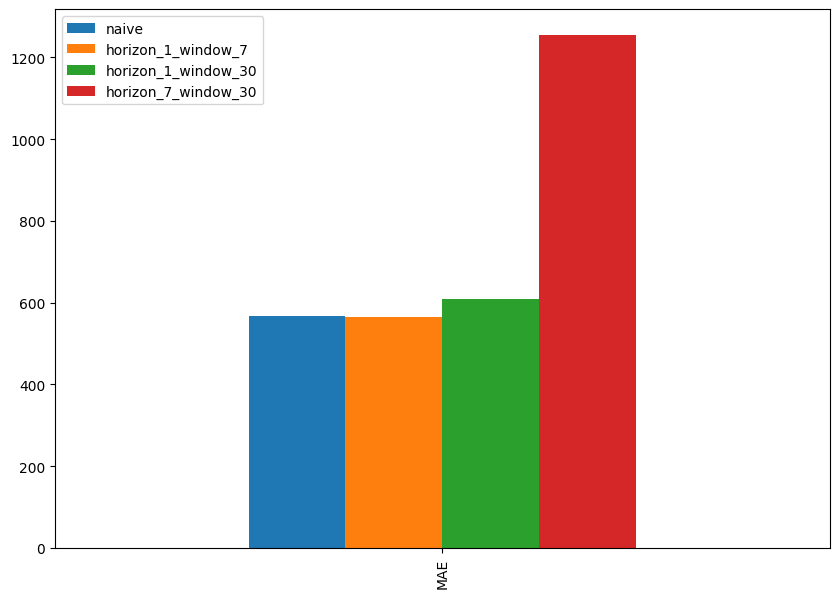

In [ ]:
#best performing models so far
pd.DataFrame({"naive":naive_results["MAE"],
              "horizon_1_window_7":model_1_results["MAE"],
               "horizon_1_window_30":model_2_results["MAE"],
               "horizon_7_window_30":model_3_results["MAE"]},index=["MAE"]).plot(figsize=(10,7),kind="bar")

In [ ]:
#Model 4:Conv1D
HORIZON=1
WINDOW_SIZE=7

In [ ]:
full_windows,full_labels=make_windows(prices,windows_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(train_labels)

(2224, 2224)

In [ ]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))

In [ ]:
print(f"Original Shape;{x.shape}")
print(f"Expanded Shape:{expand_dims_layer(x).shape}")
print(f"Original values with exapnded shape:\n{expand_dims_layer(x)}")

Original Shape;(7,)
Expanded Shape:(7, 1)
Original values with exapnded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128,kernel_size=5,strides=1,padding="causal",activation="relu"),
    layers.Dense(HORIZON)
],name="model_4_Conv1D")

In [ ]:
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_19 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               3968      
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 673.1727


673.1726684570312

In [ ]:
model_4=tf.keras.models.load_model("/content/model_experiments/model_4_Conv1D")

In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 565.1123


565.1123046875

In [ ]:
model_4_preds=make_preds(model_4,input_data=test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8880.395, 8802.418, 9019.988, 8788.996, 8769.763, 8746.966,
       8673.953, 8555.382, 8468.299, 8529.373], dtype=float32)>

In [ ]:
model_4_results=evaluate_pred(tf.squeeze(test_labels),model_4_preds)
model_4_results

{'MAE': 565.11237,
 'MSE': 1166054.5,
 'RSME': 1079.84,
 'MAPE': 2.5277915,
 'MASE': 0.9927459}

In [ ]:
tf.random.set_seed(42)

inputs=layers.Input(shape=(WINDOW_SIZE))
x=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)
# x=layers.LSTM(128,return_sequences=True)(x)
x=layers.LSTM(128,activation="relu")(x)
# x=layers.Dense(32,activation="relu")(x)
output=layers.Dense(HORIZON,activation="linear")(x)
model_5=tf.keras.Model(inputs,output,name="model_5_LSTM")


In [ ]:
model_5.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 117ms/step - loss: 2605.6990 - val_loss: 13202.5469
Epoch 2/100
18/18 [==============================] - 2s 101ms/step - loss: 1504.6851 - val_loss: 5103.9717
Epoch 3/100
18/18 [==============================] - 2s 104ms/step - loss: 379.6759 - val_loss: 1512.0726
Epoch 4/100
18/18 [==============================] - 3s 149ms/step - loss: 217.5826 - val_loss: 1144.4126
Epoch 5/100
18/18 [==============================] - 2s 142ms/step - loss: 186.7875 - val_loss: 1072.4609
Epoch 6/100
18/18 [==============================] - 2s 106ms/step - loss: 184.7813 - val_loss: 1031.8586
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 184.6145 - val_loss: 1047.7231
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 182.5169 - val_loss: 1052.0394
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 181.0895 - val_loss: 1044.2792
Epoch 10/100
18/18 [=============================

In [ ]:
#Load in best version of model 5 and evaluate on the test data
model_5=tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")

In [ ]:
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 593.7981


593.798095703125

In [ ]:
model_5_preds=make_preds(model_5,test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8961.52 , 8820.729, 8963.674, 8805.072, 8752.369, 8741.484,
       8700.712, 8558.764, 8477.444, 8514.182], dtype=float32)>

In [ ]:
model_5_results=evaluate_pred(tf.squeeze(test_labels),model_5_preds)
model_5_results

{'MAE': 593.7981,
 'MSE': 1260844.2,
 'RSME': 1122.8732,
 'MAPE': 2.6678689,
 'MASE': 1.0431387}

In [ ]:
#Make a multivariate time series dataset
block_reward_1=50 # 3 January 2009 (2009-01-03)-this block reward isn't in our dataset
block_reward_2=25
block_reward_3=12.5
block_reward_4=6.25

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")


In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2414)

In [ ]:
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),columns=bitcoin_prices_block.columns,index=bitcoin_prices_block.index)

<Axes: xlabel='Date'>

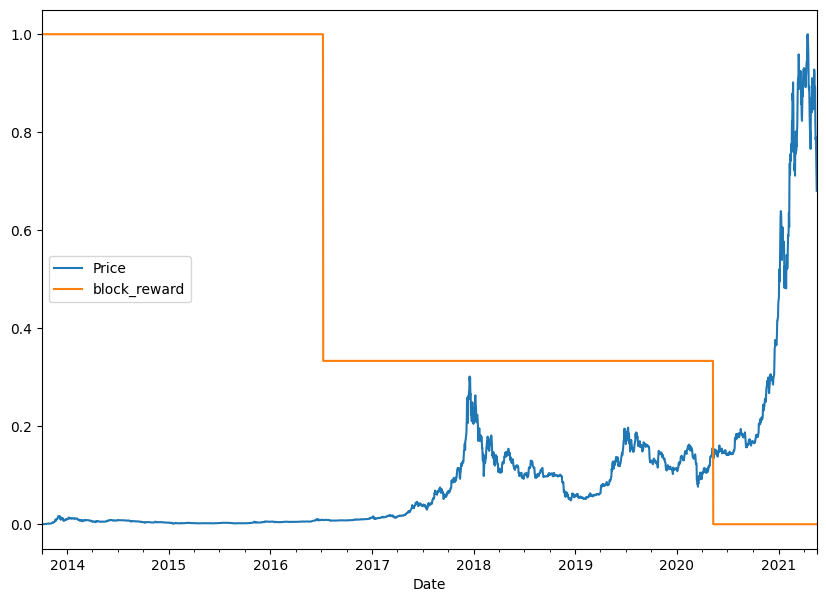

In [ ]:
scaled_price_block_df.plot(figsize=(10,7))

In [ ]:
#making dataset for a multivariate dataset
HORIZON=1
WINDOW_SIZE=7

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_windowed=bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"]=bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
#Create X(windows) and y(Horizons) features
X=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
#Model 6:Multivariate Dense Model
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_6_dense_multivariate")

model_6.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,
            y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 2013.9518 

18/18 [==============================] - 1s 37ms/step - loss: 1974.6573 - val_loss: 995.0917
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 373.0490 - val_loss: 1955.4847
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 241.3914 - val_loss: 1073.8547
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 221.2049

18/18 [==============================] - 1s 30ms/step - loss: 189.7133 - val_loss: 967.9594
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 177.5949 - val_loss: 985.1132
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 132.2073

18/18 [==============================] - 0s 29ms/step - loss: 169.6028 - val_loss: 925.9716
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 165.6587 - val_loss: 933.3347
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 145.4032

18/18 [==============================] - 1s 67ms/step - loss: 162.6360 - val_loss: 892.5718
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 161.7167 - val_loss: 914.7739
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 172.7891

18/18 [==============================] - 1s 30ms/step - loss: 158.3317 - val_loss: 861.9578
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 154.0436

18/18 [==============================] - 1s 31ms/step - loss: 154.0436 - val_loss: 840.9670
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 150.7059 - val_loss: 911.7795
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 150.6038 - val_loss: 852.7087
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 159.4330

18/18 [==============================] - 1s 31ms/step - loss: 144.7588 - val_loss: 831.3425
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 148.5364

18/18 [==============================] - 1s 31ms/step - loss: 141.9521 - val_loss: 756.9852
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 120.9894

18/18 [==============================] - 1s 30ms/step - loss: 133.3848 - val_loss: 753.1052
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 120.9995

18/18 [==============================] - 1s 30ms/step - loss: 131.7838 - val_loss: 738.0991
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 146.5710

18/18 [==============================] - 1s 29ms/step - loss: 131.3566 - val_loss: 698.3721
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 129.0903 - val_loss: 727.9875
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 127.0437 - val_loss: 717.1483
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 138.4725

18/18 [==============================] - 1s 41ms/step - loss: 129.4205 - val_loss: 679.3990
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 135.9411

18/18 [==============================] - 1s 43ms/step - loss: 129.7954 - val_loss: 671.7890
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 124.4667

18/18 [==============================] - 1s 43ms/step - loss: 124.6757 - val_loss: 662.4705
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 124.3885

18/18 [==============================] - 1s 34ms/step - loss: 123.6938 - val_loss: 658.4030
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 138.6031

18/18 [==============================] - 0s 28ms/step - loss: 122.6629 - val_loss: 655.4445
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 122.1703

18/18 [==============================] - 1s 29ms/step - loss: 122.6995 - val_loss: 648.9227
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 123.8993 - val_loss: 653.3611
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7495 - val_loss: 659.6385
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 120.2342 - val_loss: 671.7774
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 137.5981

18/18 [==============================] - 0s 29ms/step - loss: 125.8941 - val_loss: 641.3008
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 126.4226 - val_loss: 771.5732
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 134.9594

18/18 [==============================] - 0s 29ms/step - loss: 123.0617 - val_loss: 628.6113
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 122.4220 - val_loss: 638.1812
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0692 - val_loss: 628.8719
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 104.0137

18/18 [==============================] - 1s 30ms/step - loss: 116.6696 - val_loss: 626.9535
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2177 - val_loss: 629.1959
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 117.6006

18/18 [==============================] - 0s 28ms/step - loss: 117.6006 - val_loss: 615.2557
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2053 - val_loss: 621.4424
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6130 - val_loss: 616.1009
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 107.6583

18/18 [==============================] - 1s 29ms/step - loss: 115.2535 - val_loss: 608.5808
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2607 - val_loss: 629.2564
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 118.0584 - val_loss: 623.4952
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 117.1039 - val_loss: 671.7667
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 121.5227 - val_loss: 609.5687
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 80.3597

18/18 [==============================] - 0s 29ms/step - loss: 114.6815 - val_loss: 605.2939
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 84.8027

18/18 [==============================] - 0s 29ms/step - loss: 113.9019 - val_loss: 597.7875
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6746 - val_loss: 624.4189
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7249 - val_loss: 607.2885
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6237 - val_loss: 695.4891
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 125.3570 - val_loss: 666.2212
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 103.0347

18/18 [==============================] - 1s 30ms/step - loss: 114.8323 - val_loss: 590.1539
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 122.2465

18/18 [==============================] - 1s 29ms/step - loss: 112.8641 - val_loss: 589.2873
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0213 - val_loss: 626.5583
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 104.6483

18/18 [==============================] - 0s 29ms/step - loss: 114.8692 - val_loss: 588.5998
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 121.5947 - val_loss: 590.1928
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0480 - val_loss: 789.4948
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 141.0077 - val_loss: 725.1585
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 125.0458 - val_loss: 676.1026
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 84.0723

18/18 [==============================] - 0s 29ms/step - loss: 111.4188 - val_loss: 582.6996
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4932 - val_loss: 597.9631
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6089 - val_loss: 630.6303
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8618 - val_loss: 624.9623
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2844 - val_loss: 600.8208
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8809 - val_loss: 602.4849
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5899 - val_loss: 594.6847
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 117.4877

18/18 [==============================] - 1s 31ms/step - loss: 110.1153 - val_loss: 577.2999
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 109.9099 - val_loss: 716.4963
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8971 - val_loss: 671.1447
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 128.4145 - val_loss: 667.4995
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 130.4985 - val_loss: 580.5772
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 113.4715 - val_loss: 586.4741
Epoch 72/100
13/18 [====================>.........] - ETA: 0s - loss: 109.7645

18/18 [==============================] - 1s 44ms/step - loss: 109.7900 - val_loss: 573.8153
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8469 - val_loss: 580.8103
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 111.1242 - val_loss: 584.9678
Epoch 75/100
14/18 [======================>.......] - ETA: 0s - loss: 107.8266

18/18 [==============================] - 1s 38ms/step - loss: 109.3353 - val_loss: 572.4930
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4446 - val_loss: 582.7527
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5793 - val_loss: 573.7485
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9258 - val_loss: 586.3676
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6771 - val_loss: 602.1799
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3966 - val_loss: 618.3561
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 99.4788

18/18 [==============================] - 1s 60ms/step - loss: 109.1771 - val_loss: 569.7170
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 115.7850 - val_loss: 579.8730
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 116.3915 - val_loss: 620.8625
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5076 - val_loss: 588.7632
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7528 - val_loss: 580.5298
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6977 - val_loss: 570.0292
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5820 - val_loss: 584.9691
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7462 - val_loss: 627.7974
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 110.8971

18/18 [==============================] - 1s 30ms/step - loss: 108.1487 - val_loss: 566.9420
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 106.4519 - val_loss: 592.0883
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1410 - val_loss: 579.5145
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5263 - val_loss: 605.2276
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 122.0127 - val_loss: 677.7877
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6776 - val_loss: 579.5430
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 136.1214

18/18 [==============================] - 1s 29ms/step - loss: 106.3248 - val_loss: 565.6608
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7616 - val_loss: 639.7621
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1097 - val_loss: 585.3317
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8255 - val_loss: 568.1552
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9146 - val_loss: 583.9781
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2413 - val_loss: 665.6203


In [ ]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 665.6204


665.620361328125

In [ ]:
model_6=tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")

In [ ]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 565.6607


565.6607055664062

In [ ]:
model_6_preds=tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8868.151, 8780.305, 9039.186, 8796.486, 8753.202, 8771.336,
       8672.173, 8543.357, 8474.602, 8532.642], dtype=float32)>

In [ ]:
model_6_results=evaluate_pred(y_test,model_6_preds)

In [ ]:
model_6_results

{'MAE': 565.66077,
 'MSE': 1158624.9,
 'RSME': 1076.3944,
 'MAPE': 2.5285695,
 'MASE': 0.99370927}

In [ ]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RSME': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [ ]:
#Model 7:N-beats Algorithm
#Building and testing Block input layer

In [ ]:
#create custom NBeatBLock layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs):#kwargs takes care of all arguments in the parent class
      super().__init__(**kwargs)
      self.input_size=input_size
      self.theta_size=theta_size
      self.horizon=horizon
      self.n_neurons=n_neurons
      self.n_layers=n_layers

      #Block contains stack of 4 fully connected layers each has Relu Activation
      self.hidden=[tf.keras.layers.Dense(n_neurons,activation="relu")for _ in range(n_layers)]

      #Output of block is a theta layer with a linear activation
      self.theta_layer=tf.keras.layers.Dense(theta_size,activation="linear",name="theta")

  def call(self,inputs):
    x=inputs
    for layer in self.hidden:
      x=layer(x)
    theta=self.theta_layer(x)
    backcast,forecast=theta[:,:self.input_size],theta[:,-self.horizon]
    return backcast,forecast

In [ ]:
dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW_SIZE,
                                     theta_size=WINDOW_SIZE+HORIZON,
                                     horizon=HORIZON,
                                     n_neurons=128,
                                     n_layers=4)

In [ ]:
#create dummy inputs
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
#pass dummy inputs to dummy NBeatsBlock layer
backcast,forecast=dummy_nbeats_block_layer(dummy_inputs)
#these are activation outputs of the theta layer("They will be randomised because of no training")
print(f"BackCast:{tf.squeeze(backcast.numpy())}")
print(f"ForeCast:{tf.squeeze(forecast.numpy())}")

BackCast:[ 0.1774971   0.48271942  0.67307824  0.01560223 -0.11917439 -0.10580373
 -0.31615907]
ForeCast:0.18005666136741638


In [ ]:
#Preparing data using tf.data
HORIZON=1
WINDOW_SIZE=7

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats=bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price{i+1}"]=bitcoin_prices_nbeats["Price"].shift(periods=i+1)

In [ ]:
bitcoin_prices_nbeats.head()

,Price,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
#Make features and labels
X=bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y=bitcoin_prices_nbeats.dropna()["Price"]

In [ ]:
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

In [ ]:
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

In [ ]:
#Batch and prefetch
BATCH_SIZE=1024
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
#Setting up hyperparameters for N-BEATS algorithm
N_EPOCHS=5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30
INPUT_SIZE=WINDOW_SIZE*HORIZON
THETA_SIZE=INPUT_SIZE+HORIZON

In [ ]:
#Residual connections
#we need two layers for subtract and add
tensor_1=tf.range(10)+10
tensor_2=tf.range(10)
tensor_1,tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
#Subtract
subtracted=layers.subtract([tensor_1,tensor_2])

#Add
added=layers.add([tensor_1,tensor_2])
print(f"Input tensors:{tensor_1.numpy()} and {tensor_2.numpy()}")
print(f"Subtracted:{subtracted.numpy()}")
print(f"Added:{added.numpy()}")

Input tensors:[10 11 12 13 14 15 16 17 18 19] and [0 1 2 3 4 5 6 7 8 9]
Subtracted:[10 10 10 10 10 10 10 10 10 10]
Added:[10 12 14 16 18 20 22 24 26 28]


In [ ]:
%%time

tf.random.set_seed(42)

#1.Setup and instance of NBeatsBlock
nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name="InitialBlock")

#2.Create input layer to stack
stack_input=layers.Input(shape=(INPUT_SIZE),name="stack_input")

#3.Create initial backcast and forecast input(backwards prediction+horizon prediction)
residuals,forecast=nbeats_block_layer(stack_input)

#4.Create stacks of block layers
for i,_ in enumerate(range(N_STACKS-1)):

  #5.Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast,block_forecast=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name=f"NBeatsBlock{i}")(residuals)

  #6.Create the double residual stacking
  residuals=layers.subtract([residuals,backcast],name=f"subtract_{i}")
  forecast=layers.add([forecast,block_forecast],name=f"add_{i}")

#7.Put stack model together
model_7=tf.keras.Model(inputs=stack_input,outputs=forecast,name="model_7_NBEATS")

#8.Compile
model_7.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

#9.Fit the model with 5000 epochs and callbacks such as earlystopping and reduceLROnPlateau
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=200,restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=100,verbose=1)])


Epoch 737: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1160: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1260: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 52s, sys: 6.85 s, total: 4min 59s
Wall time: 5min 49s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 26ms/step - loss: 572.2769


572.27685546875

In [ ]:
model_7_preds=make_preds(model_7,test_dataset)

1/1 [==============================] - 1s 1s/step


In [ ]:
model_7_results=evaluate_pred(y_test,model_7_preds)
model_7_results

{'MAE': 572.27686,
 'MSE': 1159539.6,
 'RSME': 1076.8192,
 'MAPE': 2.5911307,
 'MASE': 1.0053319}

In [ ]:
model_1_results

{'MAE': 565.41064,
 'MSE': 1162941.5,
 'RSME': 1078.3977,
 'MAPE': 2.5172708,
 'MASE': 0.9932699}

In [ ]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RSME': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

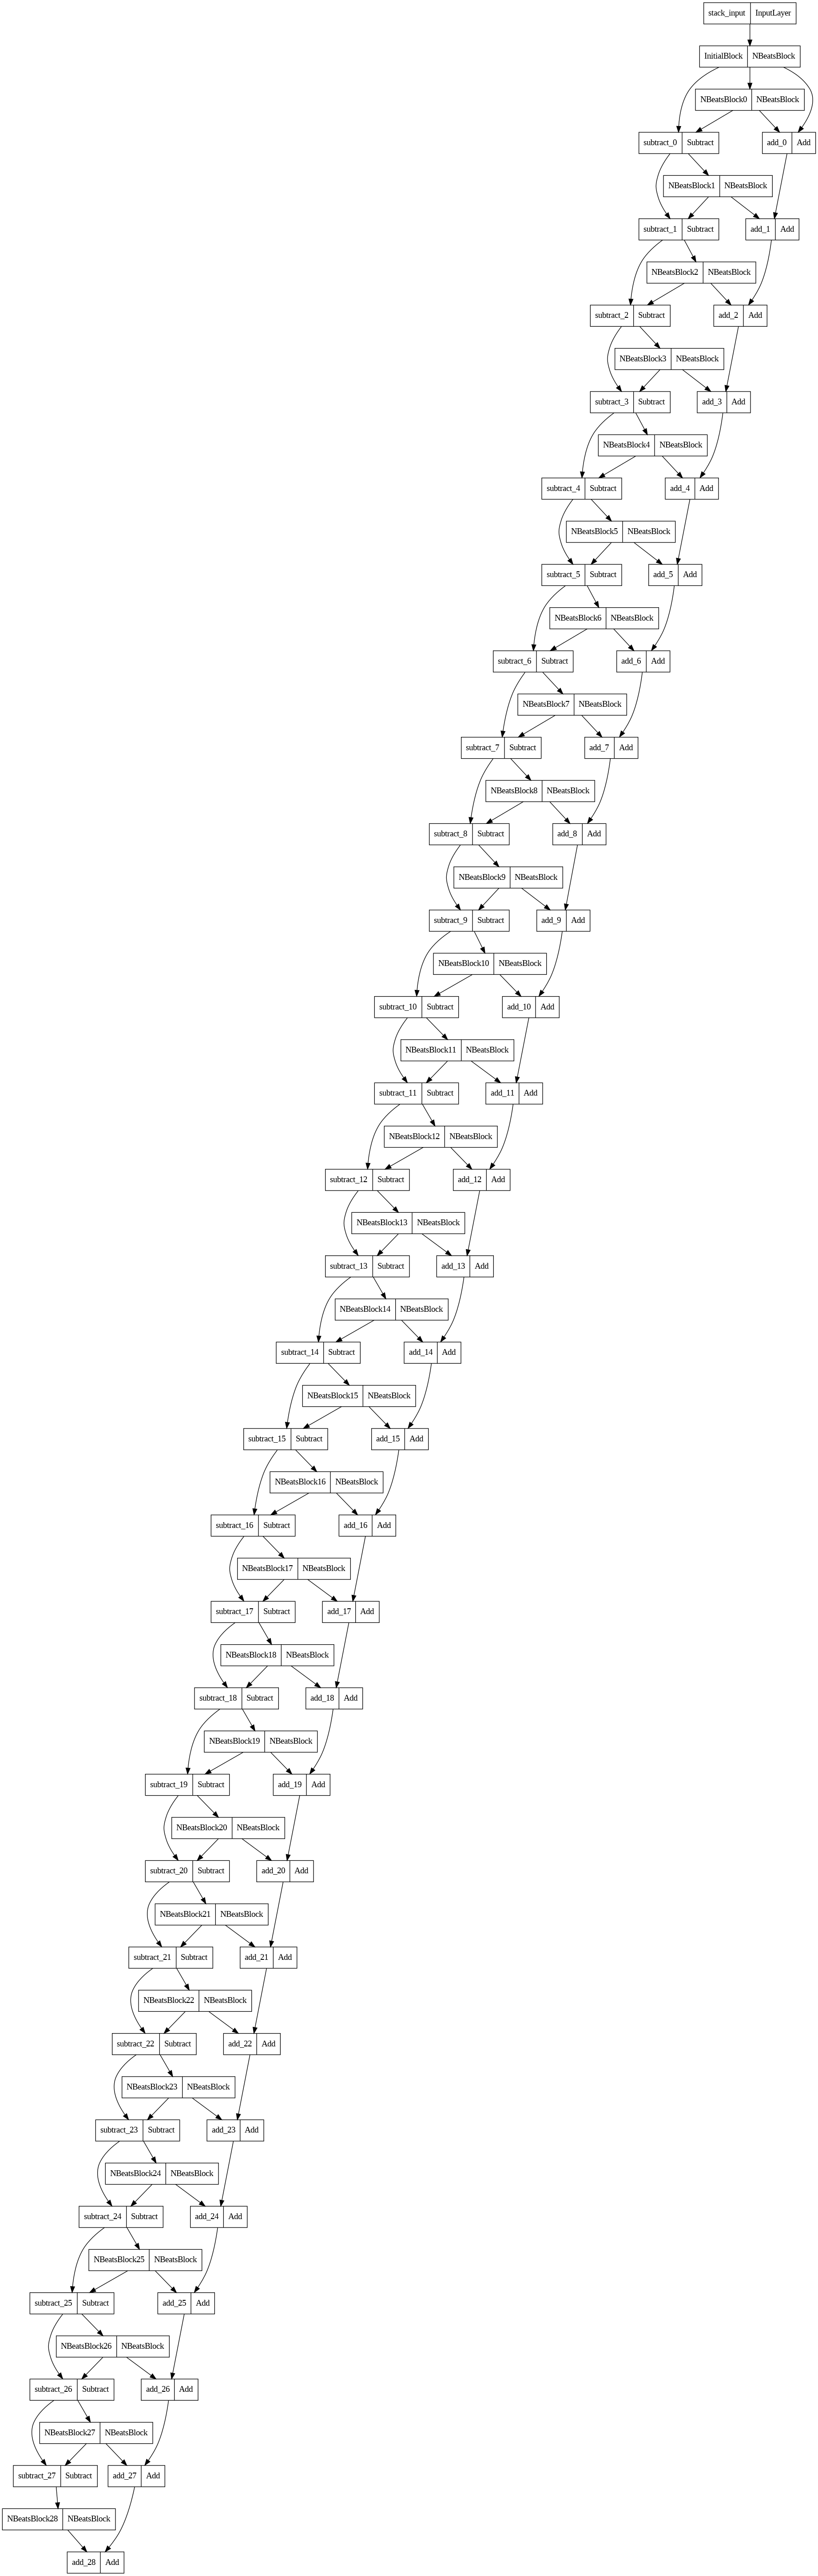

In [ ]:
#Plot the N-Beats architecture we've created
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [ ]:
HORIZON,WINDOW_SIZE

(1, 7)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
  ensemble_models=[]

  for i in range(num_iter):
    for loss_function in loss_fns:
        print(f"Optimizing model by reducing:{loss_function} for {num_epochs} epochs,model number:{i}")
        #construct model similar to model 1
        model=tf.keras.Sequential([
            layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
            layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
            layers.Dense(HORIZON)
        ])

        model.compile(loss=loss_function,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["mae","mse"])
        #Fit the model
        model.fit(train_data,
                  epochs=num_epochs,
                  verbose=0,
                  validation_data=test_data,
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=200,restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=100,verbose=1)]
                  )
        ensemble_models.append(model)
  return ensemble_models

In [ ]:
ensemble_models=get_ensemble_models(num_iter=5,num_epochs=1000)

Optimizing model by reducing:mae for 1000 epochs,model number:0

Epoch 604: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 704: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mse for 1000 epochs,model number:0

Epoch 198: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 298: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mape for 1000 epochs,model number:0

Epoch 173: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 273: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mae for 1000 epochs,model number:1

Epoch 681: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 781: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mse for 1000 epochs,model number:1

Epoch 421: ReduceLROnPlateau reducing 

In [ ]:
ensemble_models

In [ ]:
len(ensemble_models)

15

In [ ]:
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
#create a list of ensemble predictions
%%time
ensemble_preds=make_ensemble_preds(ensemble_models,test_dataset)
ensemble_preds.shape

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 39ms/step
CPU times: user 704 ms, sys: 35.2 ms, total: 739 ms
Wall time: 832 ms


TensorShape([15, 556])

In [ ]:
ensemble_mean=tf.reduce_mean(ensemble_preds,axis=0)

In [ ]:
ensemble_median=np.median(ensemble_preds,axis=0)

In [ ]:
model_8_results=evaluate_pred(y_test,ensemble_median)
model_8_results

{'MAE': 563.26044,
 'MSE': 1134131.4,
 'RSME': 1064.956,
 'MAPE': 2.540409,
 'MASE': 0.9894926}

In [ ]:
#Find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds):
  std=tf.math.reduce_std(preds,axis=0)
  interval=1.96*std
  preds_mean=tf.reduce_mean(preds,axis=0)
  lower,upper=preds_mean-interval,preds_mean+interval
  return lower,upper

In [ ]:
lower,upper=get_upper_lower(preds=ensemble_preds)
lower,upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8741.694 ,  8680.88  ,  8972.846 ,  8650.561 ,  8640.45  ,
         8639.404 ,  8577.085 ,  8411.863 ,  8367.721 ,  8452.776 ,
         8151.3203,  8010.6157,  7984.8013,  7526.7695,  7176.1816,
         7157.8545,  6950.3237,  7059.958 ,  7041.9883,  7416.2856,
         7340.7324,  7656.001 ,  7492.6396,  7309.8086,  7245.249 ,
         7220.0986,  7146.1875,  7308.7554,  7454.1587,  7481.734 ,
         7500.755 ,  7278.383 ,  7191.561 ,  7128.572 ,  7117.7583,
         7172.052 ,  7037.888 ,  7037.0024,  6826.658 ,  6523.224 ,
         7194.1094,  7048.1685,  7093.089 ,  7142.2915,  7131.436 ,
         7084.8975,  7159.092 ,  7156.6387,  7128.073 ,  7160.9893,
         7250.3877,  7334.848 ,  7210.23  ,  7122.4854,  7109.1616,
         6899.1367,  7156.371 ,  7283.2256,  7296.024 ,  7644.758 ,
         7996.5225,  8074.8047,  7784.942 ,  8009.4697,  8045.0576,
         8121.596 ,  8047.8096,  8636.814 ,  8827.81  ,  8705.701 ,

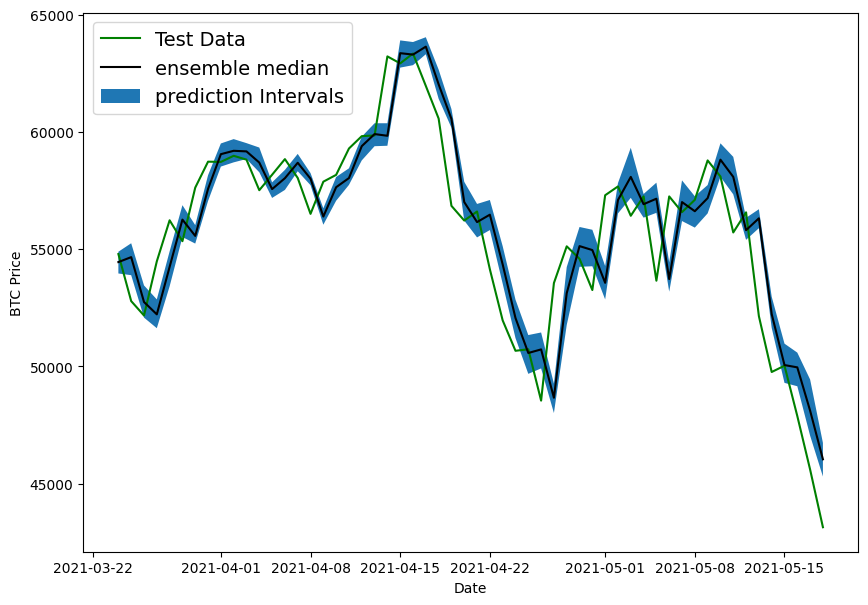

In [ ]:
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"g",label="Test Data")
plt.plot(X_test.index[offset:],ensemble_median[offset:],"k-",label="ensemble median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],label="prediction Intervals")
plt.legend(loc="upper left",fontsize=14)

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
#Model 9:train model on full historical data and predict the future
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
X_all=bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()

In [ ]:
y_all=bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
len(X_all),len(y_all)

(2780, 2780)

In [ ]:
features_dataset_all=tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all=tf.data.Dataset.from_tensor_slices(y_all)

dataset_all=tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))

BATCH_SIZE=1024

dataset_all=dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
            layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
            layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
            layers.Dense(HORIZON)
        ],name="model_9_future_model")

model_9.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())
model_9.fit(dataset_all,epochs=100,verbose=0)

In [ ]:
INTO_FUTURE=14

In [ ]:
def make_future_forecasts(values,model,into_future,window_size=WINDOW_SIZE):
  future_forecast=[]
  last_window=values[-WINDOW_SIZE:]
  for _ in range(into_future):
    future_pred=model.predict(tf.expand_dims(last_window,axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window=np.append(last_window,future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [ ]:
future_forecast=make_future_forecasts(y_all,model_9,INTO_FUTURE,window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 53ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 41713.57421875

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 41713.57421875] -> Prediction: 40103.42578125

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 41713.57421875 40103.42578125] -> Prediction: 38722.12109375

1/1 [==============================] - 0s 22ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 41713.57421875 40103.42578125 38722.12109375] -> Prediction: 36378.91796875

1/1 [==============================] - 0s 30ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 41713.57421875
 40103.42578125 38722.12109375 36378.917968

In [ ]:
def get_future_dates(start_date,into_future,offset=1):
  start_date=start_date+np.timedelta64(offset,"D")#specify start and D stands for day
  end_date=start_date+np.timedelta64(into_future,"D")#specify end date
  return np.arange(start_date,end_date,dtype="datetime64[D]")

In [ ]:
last_timestep=bitcoin_prices.index[-1]

In [ ]:
next_time_steps=get_future_dates(start_date=last_timestep,into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps=np.insert(next_time_steps,0,last_timestep)
future_forecast=np.insert(future_forecast,0,btc_price[-1])

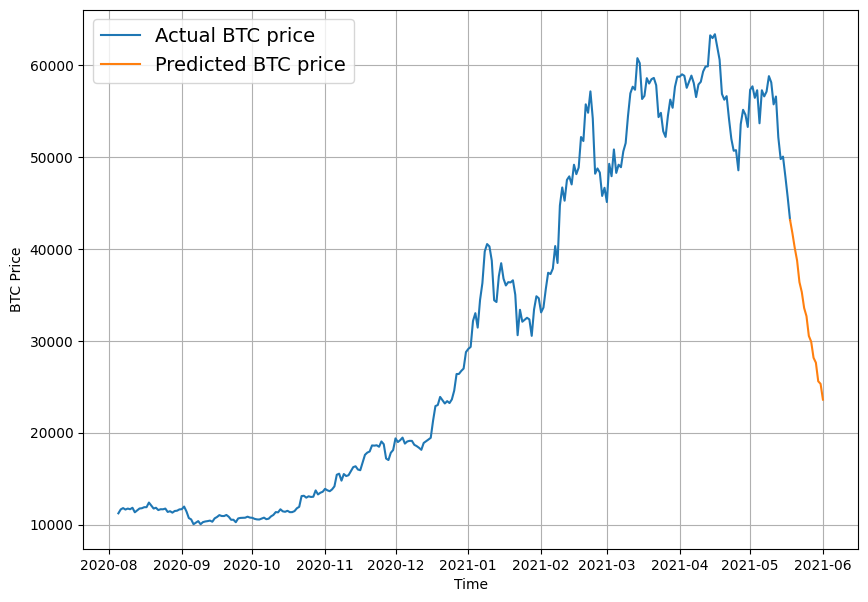

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price,start=2500,format="-",label="Actual BTC price")
plot_time_series(next_time_steps,future_forecast,format="-",label="Predicted BTC price")

In [ ]:
#Model 10:The turkey problem
#assume price falls 100x in one day
btc_price_turkey=btc_price.copy()
btc_price_turkey[-1]=btc_price_turkey[-1]/100

In [ ]:
#manufacture extra price on the end
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
#get the timestamps for the turkey problem
btc_timesteps_turkey=np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

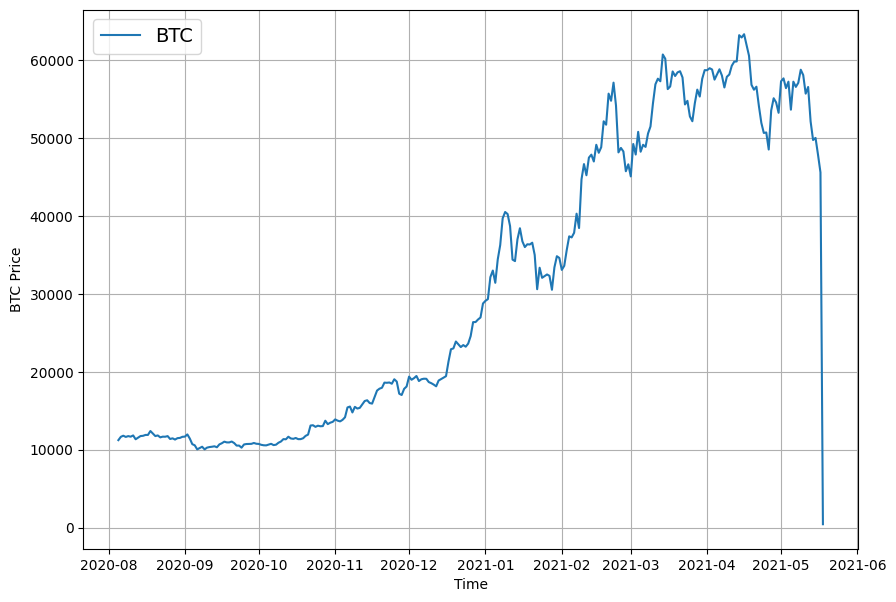

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC",
                 start=2500)

In [ ]:
full_windows,full_labels=make_windows(np.array(btc_price_turkey),windows_size=WINDOW_SIZE,horizon=HORIZON)

X_train,X_test,y_train,y_test=make_train_test_splits(full_windows,full_labels)


In [ ]:
turkey_model=tf.keras.models.clone_model(model_1)
turkey_model._name="model_10_turkey_model"

turkey_model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train,
                 y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test,y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 732.6232


732.6232299804688

In [ ]:
turkey_model=tf.keras.models.load_model("/content/model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 645.1323


645.1322631835938

In [ ]:
turkey_preds=make_preds(turkey_model,X_test)
turkey_preds

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8837.667 ,  8740.467 ,  9030.673 ,  8785.63  ,  8708.95  ,
        8738.853 ,  8683.545 ,  8485.972 ,  8456.279 ,  8517.406 ,
        8246.465 ,  8087.946 ,  8052.817 ,  7674.3174,  7270.598 ,
        7262.678 ,  7086.8867,  7154.403 ,  7146.305 ,  7489.1123,
        7429.2715,  7703.056 ,  7581.9175,  7410.99  ,  7294.595 ,
        7321.331 ,  7209.832 ,  7360.975 ,  7513.9995,  7550.674 ,
        7546.901 ,  7365.6025,  7226.6733,  7179.725 ,  7184.5776,
        7221.5903,  7107.502 ,  7093.092 ,  6903.16  ,  6604.758 ,
        7276.547 ,  7264.3486,  7141.661 ,  7232.0728,  7298.816 ,
        7151.1665,  7216.967 ,  7224.937 ,  7183.0557,  7213.072 ,
        7307.9604,  7385.3716,  7275.1724,  7175.3306,  7161.0757,
        6978.7285,  7221.699 ,  7357.382 ,  7369.3374,  7659.69  ,
        8057.8984,  8112.557 ,  7847.529 ,  8035.342 ,  8104.8677,
        8151.9863,  8110.851 ,  8677.607 ,  8891.63  ,  8767.918 ,
        8876.6

In [ ]:
turkey_results=evaluate_pred(y_test,turkey_preds)
turkey_results

{'MAE': 17120.65,
 'MSE': 613765060.0,
 'RSME': 23696.42,
 'MAPE': 121.236565,
 'MASE': 26.49426}

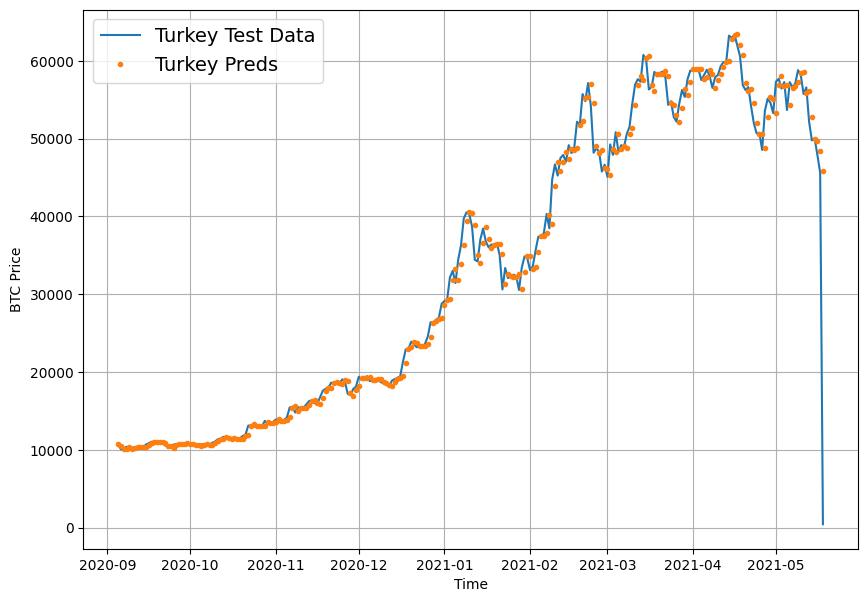

In [ ]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

In [ ]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": model_8_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,MAE,MSE,RSME,MAPE,MASE
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,565.410645,1.162942e+06,1078.397705,2.517271,0.993270
model_2_dense_w30_h1,609.407288,1.263384e+06,1124.003662,2.736761,1.065250
model_3_dense_w30_h7,1255.186401,5.676088e+06,1442.605103,5.741860,2.233534
model_4_CONV1D,565.112366,1.166054e+06,1079.839966,2.527792,0.992746
model_5_LSTM,593.798096,1.260844e+06,1122.873169,2.667869,1.043139
model_6_multivariate,565.660767,1.158625e+06,1076.394409,2.528569,0.993709
model_8_NBEATs,563.260437,1.134131e+06,1064.956055,2.540409,0.989493
model_9_ensemble,563.260437,1.134131e+06,1064.956055,2.540409,0.989493
model_10_turkey,17120.650391,6.137651e+08,23696.419922,121.236565,26.494261


<Axes: >

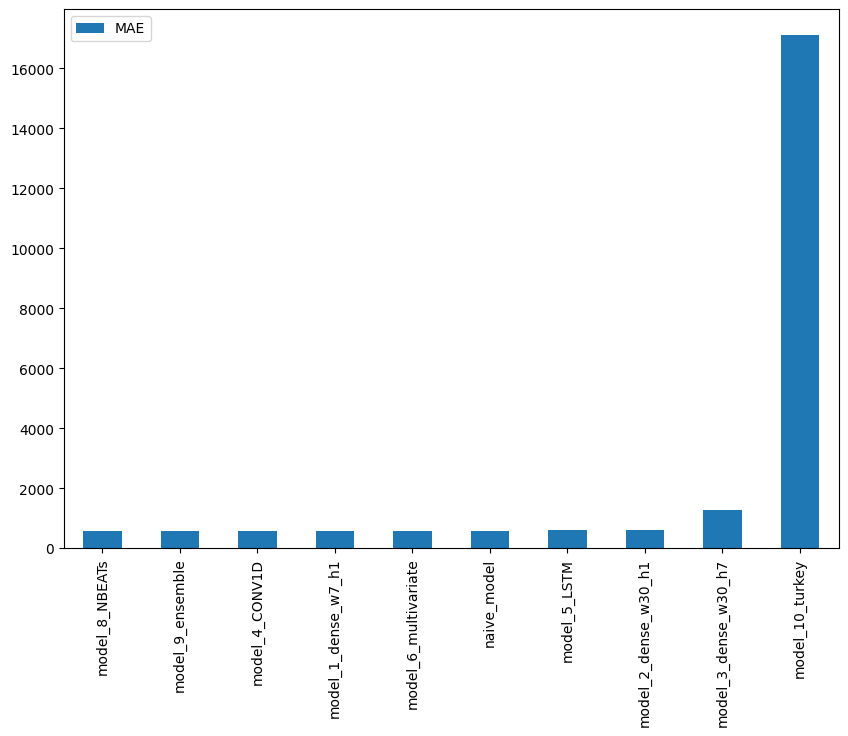

In [ ]:
model_results[["MAE"]].sort_values(by="MAE").plot(figsize=(10,7),kind="bar")